In [3]:
from google.colab import files
uploaded = files.upload()


Saving Sample - Superstore.csv to Sample - Superstore.csv


In [5]:
import pandas as pd

df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')

df.shape, df.head()


((9994, 21),
    Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
 0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
 1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
 2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
 3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
 4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
 
      Customer Name    Segment        Country             City  ...  \
 0      Claire Gute   Consumer  United States        Henderson  ...   
 1      Claire Gute   Consumer  United States        Henderson  ...   
 2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
 3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
 4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
 
   Postal Code  Region       Product ID         Category Sub-Cate

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

#CONVERT DATES

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date']  = pd.to_datetime(df['Ship Date'],  format='%m/%d/%Y')

df[['Order Date', 'Ship Date']].head()


,Order Date,Ship Date
0,2016-11-08,2016-11-11
1,2016-11-08,2016-11-11
2,2016-06-12,2016-06-16
3,2015-10-11,2015-10-18
4,2015-10-11,2015-10-18


#CONVERTING NUMERIC COLUMNS


In [8]:
df['Sales']    = pd.to_numeric(df['Sales'])
df['Profit']   = pd.to_numeric(df['Profit'])
df['Discount'] = pd.to_numeric(df['Discount'])
df['Quantity'] = pd.to_numeric(df['Quantity'])

df[['Sales', 'Profit', 'Discount', 'Quantity']].head()


,Sales,Profit,Discount,Quantity
0,261.9600,41.9136,0.00,2
1,731.9400,219.5820,0.00,3
2,14.6200,6.8714,0.00,2
3,957.5775,-383.0310,0.45,5
4,22.3680,2.5164,0.20,2


#CALCULATING KPIs

In [9]:
total_sales     = df['Sales'].sum()
total_profit    = df['Profit'].sum()
total_orders    = df['Order ID'].nunique()
total_customers = df['Customer ID'].nunique()
total_products  = df['Product ID'].nunique()
profit_margin   = (total_profit / total_sales) * 100

print("Total Sales: ", total_sales)
print("Total Profit:", total_profit)
print("Total Orders:", total_orders)
print("Total Customers:", total_customers)
print("Total Products:", total_products)
print("Profit Margin (%):", profit_margin)


Total Sales:  2297200.8603000003
Total Profit: 286397.0217
Total Orders: 5009
Total Customers: 793
Total Products: 1862
Profit Margin (%): 12.467217240315604


#IMPORTING MATPLOTLIB FOR VISUALIZATION

In [10]:
import matplotlib.pyplot as plt


#SALES BY CATEGORY (BAR CHART)

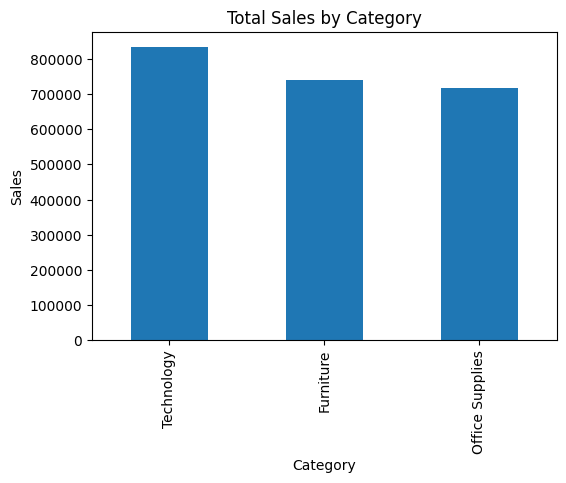

In [11]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
category_sales.plot(kind='bar')
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.show()


#PROFIT BY REGION (BAR CHART)

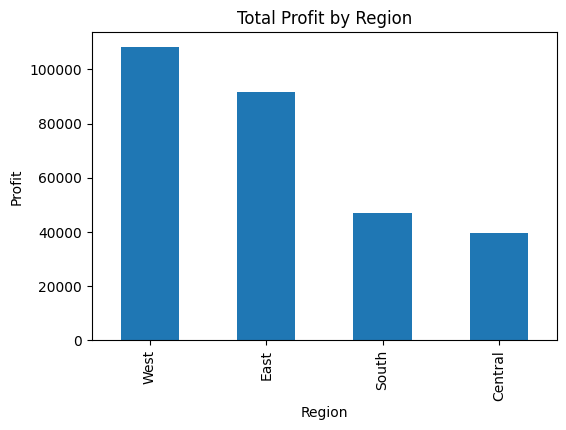

In [12]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
region_profit.plot(kind='bar')
plt.title('Total Profit by Region')
plt.ylabel('Profit')
plt.xlabel('Region')
plt.show()


#MONTHLY SALES TREND (LINE CHART)

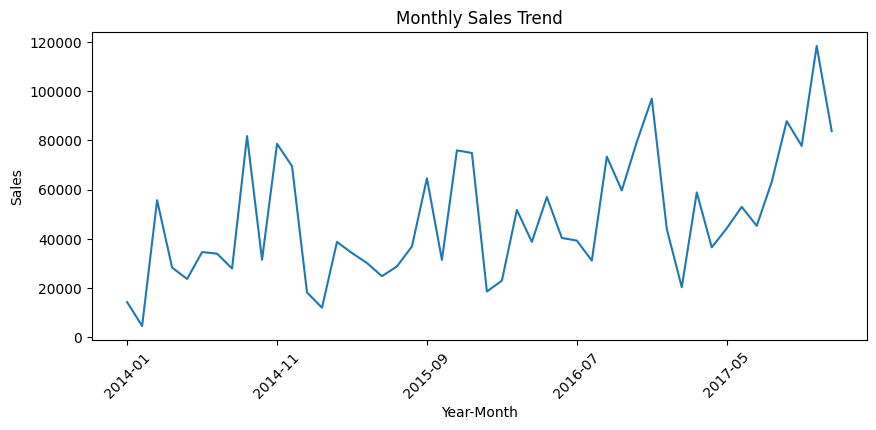

In [13]:
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

monthly_sales = df.groupby('YearMonth')['Sales'].sum()

plt.figure(figsize=(10,4))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.show()


#DISCOUNT VS PROFIT (SCATTER)

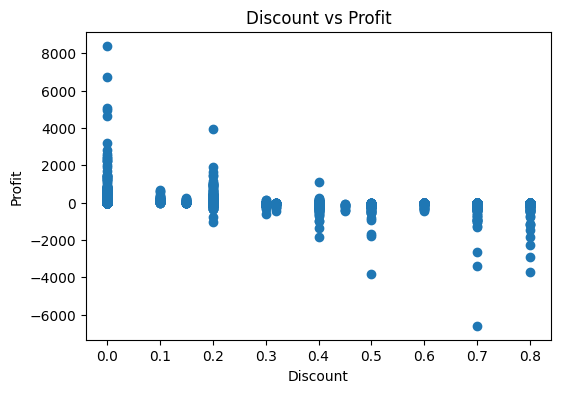

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(df['Discount'], df['Profit'])
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()
